# Project - Unsupervised Learning

### By Mohan Raju


### Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
### Domain:
Object recognition
### Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
#sklearn models
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
#Library for Model Evaluation 
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
#Other Libraries
from collections import Counter
from itertools import combinations, product
from scipy import stats
from matplotlib.colors import ListedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [135]:
dataframe = pd.read_csv("vehicle.csv")

In [136]:
# Basic statistics 
dataframe.shape

(846, 19)

Rows - 846

Columns - 19

In [137]:
dataframe['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [138]:
dataframe.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [139]:
# Missing values in each columns
dataframe.isnull().sum()


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [140]:
dataframe.isnull().sum().sum()

41

41 - Total number of missing values in the entire dataframe.

Missing Value Treatement

In [141]:
null_cols = []
for cols in dataframe.columns:
    if dataframe[cols].isnull().sum() == 0:
        continue
    else:
        null_cols.append(cols)
        print('{} : \nMean = {}, \nMedian = {}, \nMode = {} '.format(cols,
                                                              dataframe[cols].mean(),
                                                              dataframe[cols].median(),
                                                              dataframe[cols].mode()))
        print('')

circularity : 
Mean = 44.828775267538646, 
Median = 44.0, 
Mode = 0    43.0
dtype: float64 

distance_circularity : 
Mean = 82.1104513064133, 
Median = 80.0, 
Mode = 0    66.0
dtype: float64 

radius_ratio : 
Mean = 168.88809523809525, 
Median = 167.0, 
Mode = 0    197.0
dtype: float64 

pr.axis_aspect_ratio : 
Mean = 61.67890995260664, 
Median = 61.0, 
Mode = 0    64.0
dtype: float64 

scatter_ratio : 
Mean = 168.901775147929, 
Median = 157.0, 
Mode = 0    150.0
dtype: float64 

elongatedness : 
Mean = 40.933727810650886, 
Median = 43.0, 
Mode = 0    31.0
1    45.0
dtype: float64 

pr.axis_rectangularity : 
Mean = 20.582443653618032, 
Median = 20.0, 
Mode = 0    19.0
dtype: float64 

scaled_variance : 
Mean = 188.63107947805457, 
Median = 179.0, 
Mode = 0    170.0
dtype: float64 

scaled_variance.1 : 
Mean = 439.49407582938386, 
Median = 363.5, 
Mode = 0    327.0
1    330.0
2    333.0
dtype: float64 

scaled_radius_of_gyration : 
Mean = 174.70971563981044, 
Median = 173.5, 
Mode = 0  

In [142]:
# Impute missing values with median
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer = imputer.fit(dataframe[null_cols])
dataframe[null_cols] = imputer.transform(dataframe[null_cols] )

In [143]:
dataframe.isnull().sum().sum() # all missing value has be imputed with median value

0

Outliers Treatement

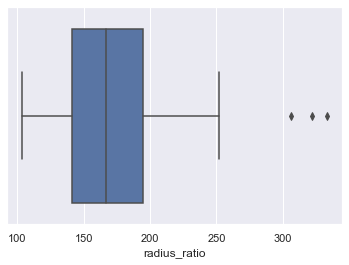

In [144]:
import seaborn as sns 
sns.boxplot(dataframe ['radius_ratio'])

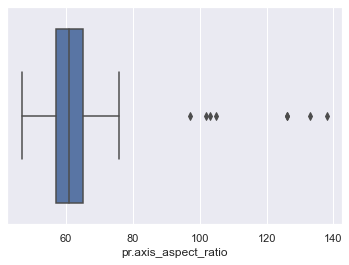

In [145]:
sns.boxplot(dataframe ['pr.axis_aspect_ratio'])

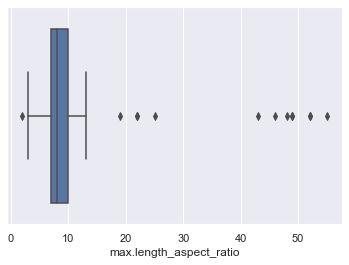

In [146]:
sns.boxplot(dataframe ['max.length_aspect_ratio'])

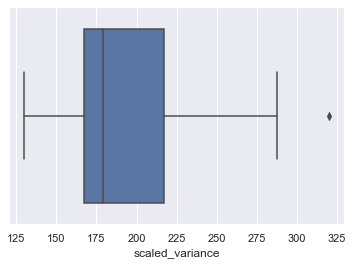

In [147]:
sns.boxplot(dataframe ['scaled_variance'])

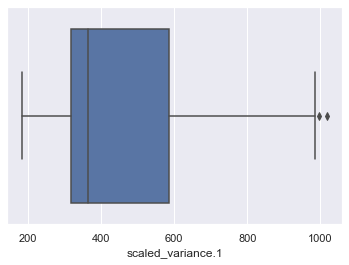

In [148]:
sns.boxplot(dataframe ['scaled_variance.1'])

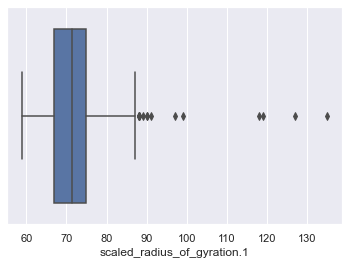

In [149]:
sns.boxplot(dataframe ['scaled_radius_of_gyration.1'])

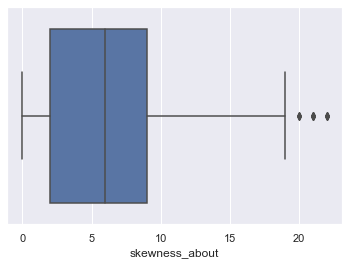

In [150]:
sns.boxplot(dataframe ['skewness_about'])

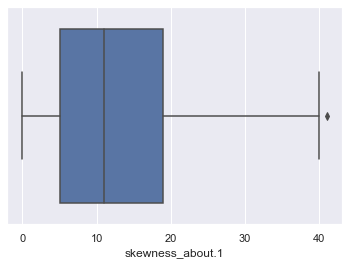

In [151]:
sns.boxplot(dataframe ['skewness_about.1'])

Observation:
 
Below attributes seem to have outliers, however it negligible.

radius_ratio	
pr.axis_aspect_ratio	
max.length_aspect_ratio
scaled_variance	
scaled_variance.1
scaled_radius_of_gyration.1	
skewness_about	
skewness_about.1

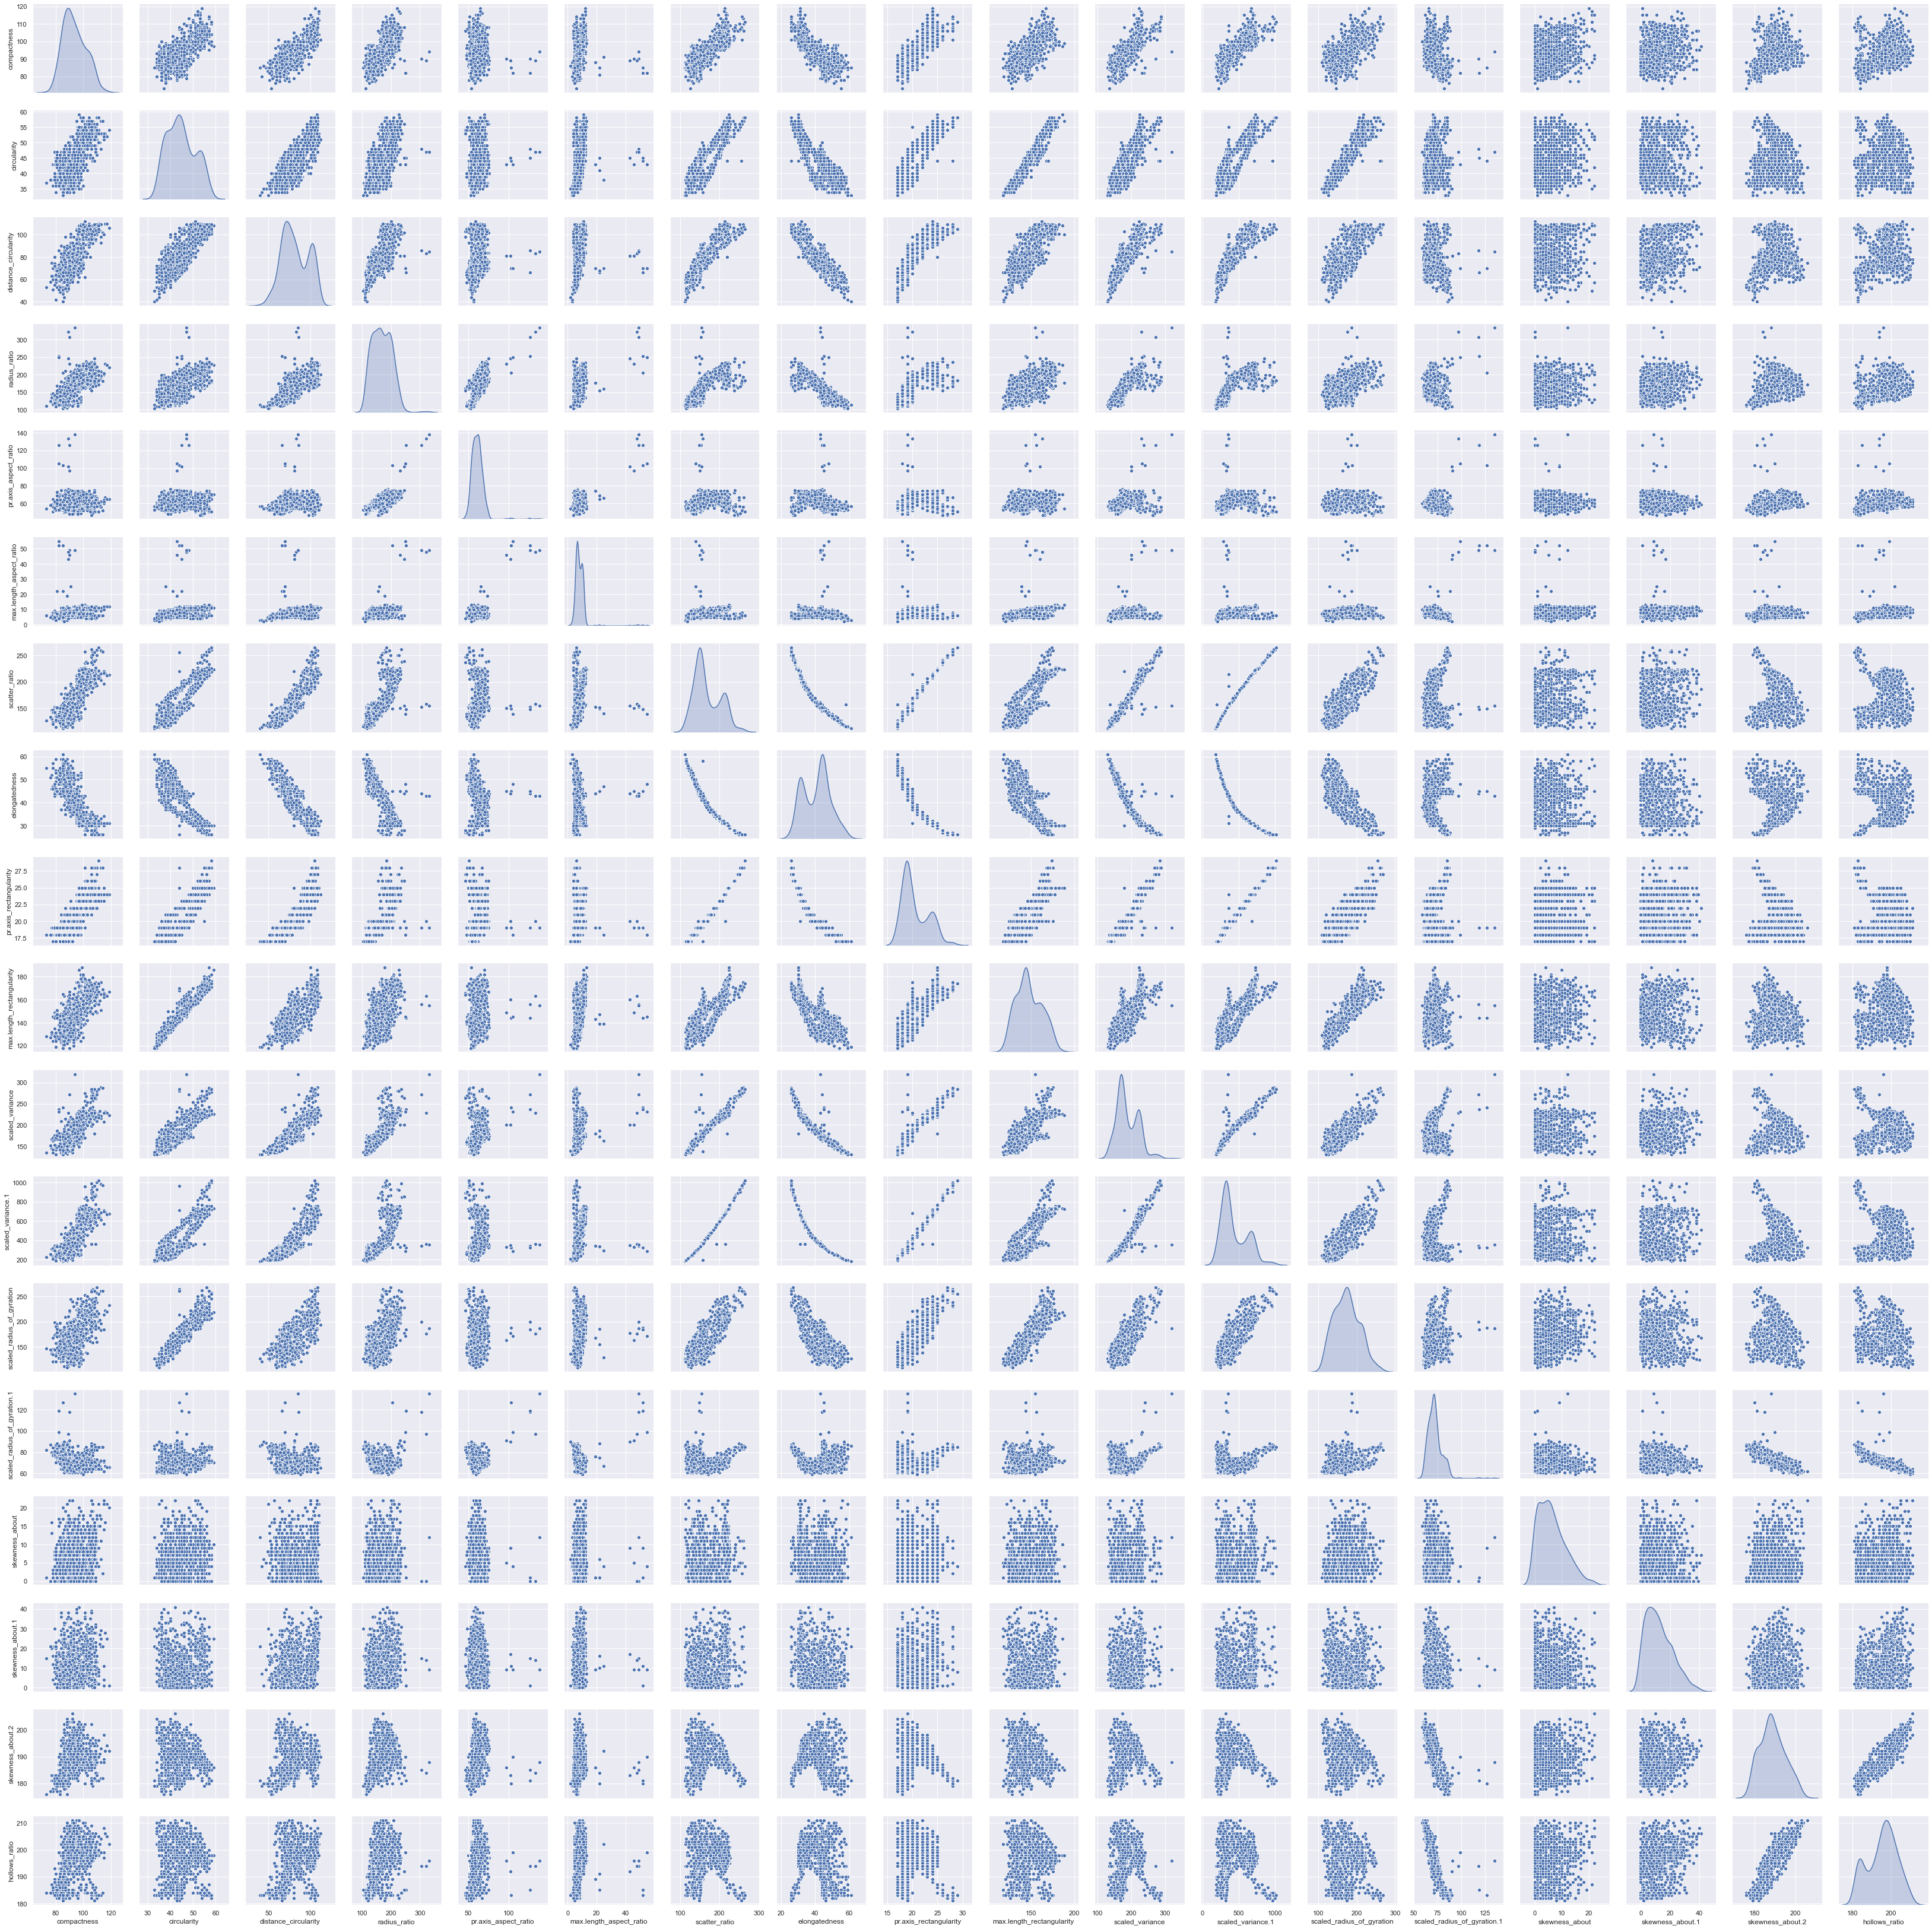

In [152]:
sns.pairplot(dataframe, diag_kind='kde')

In [153]:
dataframe.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [154]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

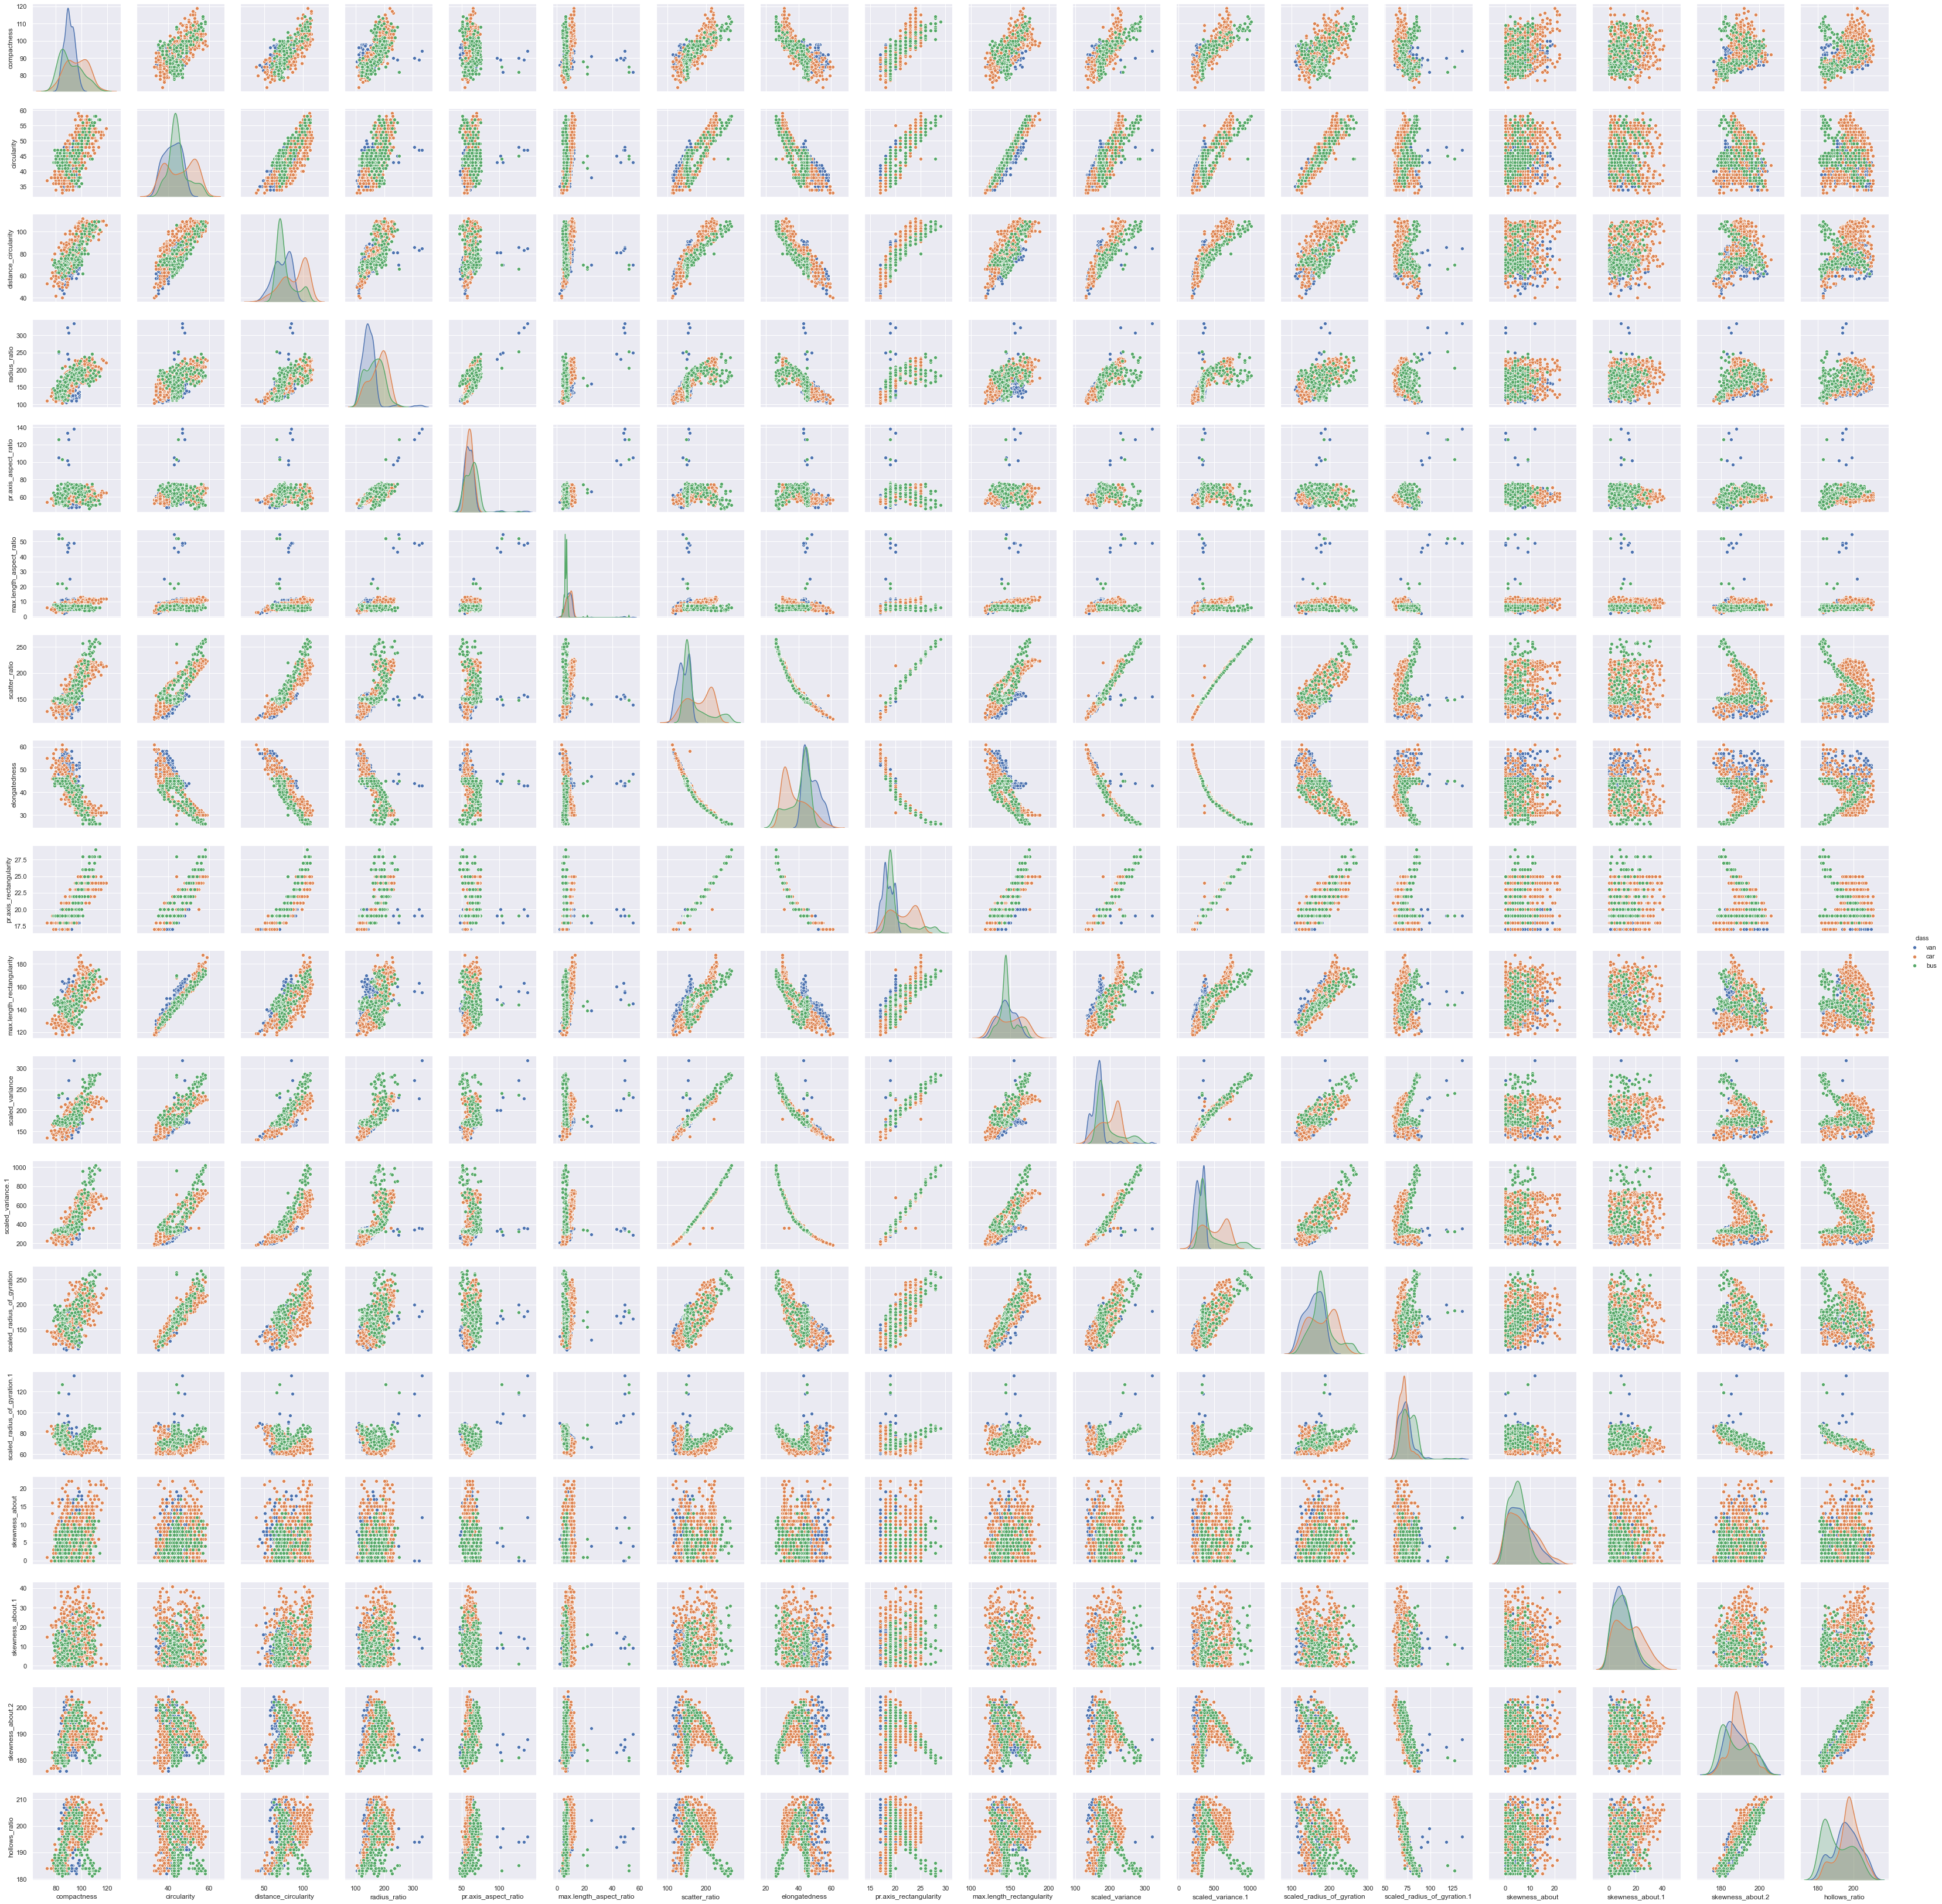

In [155]:
sns.pairplot(dataframe, hue="class",diag_kind='kde')

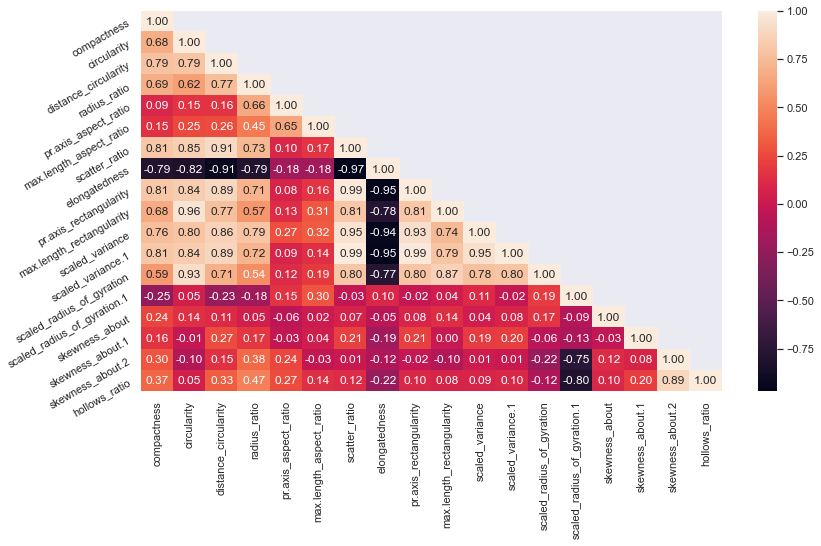

In [156]:
# Correlation with heat map

corr = dataframe.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation : Many columns are showing very strong correlation based on pairplot and Correlation with heat map

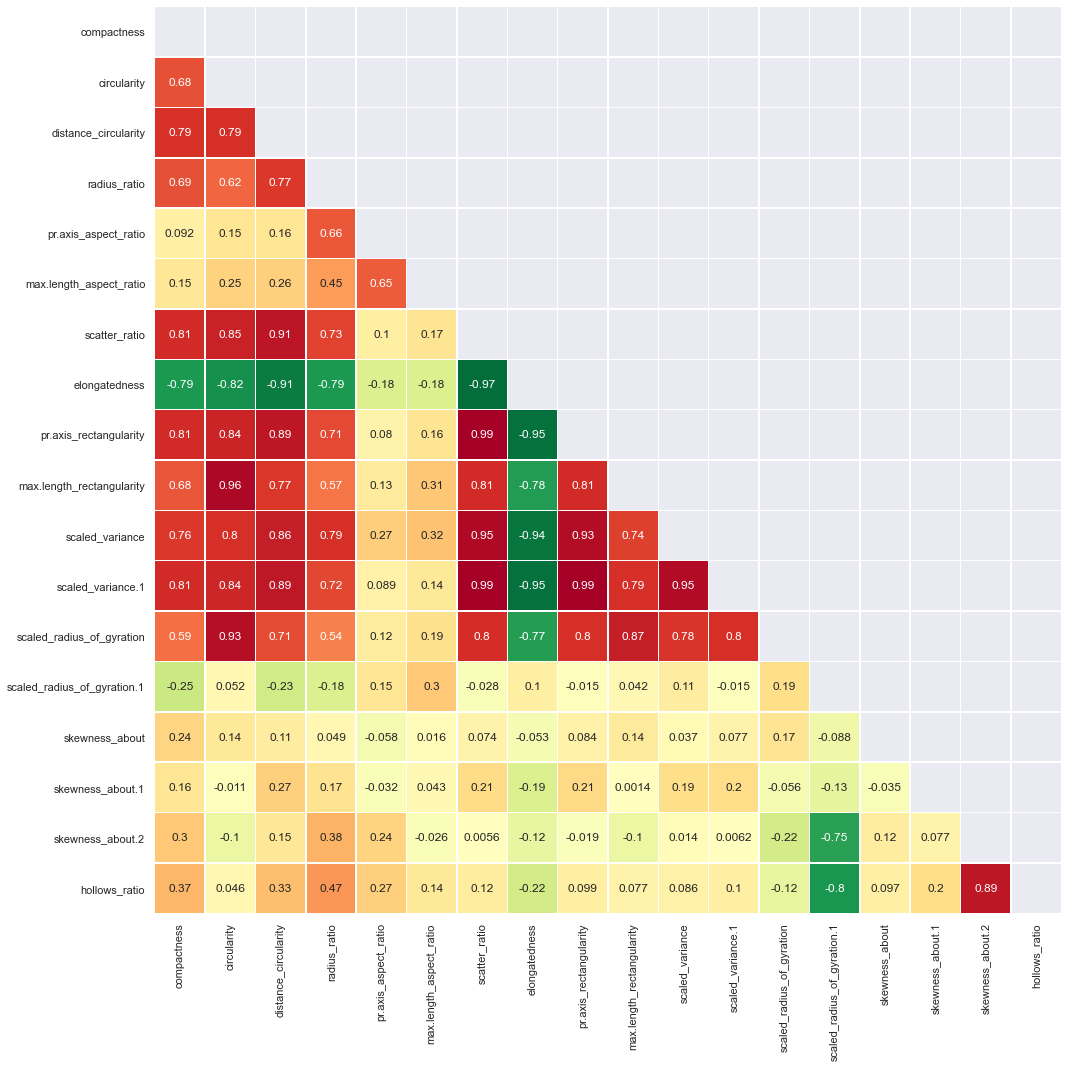

In [157]:
#Check the correlation of independent variables
sns.set(font_scale=1)
corr = dataframe.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr,
            annot=True,
            linewidths=.5,
            cmap = 'RdYlGn_r',
            center=0,
            mask = mask,
            cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.autoscale(tight=True)
plt.tight_layout()
plt.show()

In [158]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Label Encoder
label_encoder = LabelEncoder()
dataframe['class_new'] = label_encoder.fit_transform(dataframe['class'])
dataframe.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  class_new  
0             187.0            197   van          2  
1             189.0            199   van          2  
2             188.0            196   car          1  
3             199.0            207   van          2  
4             180.0            183   bus          0

In [159]:
#Create X (independent) and y (dependent) datasets
X = dataframe.drop(['class','class_new'],axis=1)
y = dataframe[['class_new']]

In [160]:
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [161]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [162]:
# Scaling Data
std_columns = X.columns
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))
X_scaled.columns = std_columns
X_scaled.head()


compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

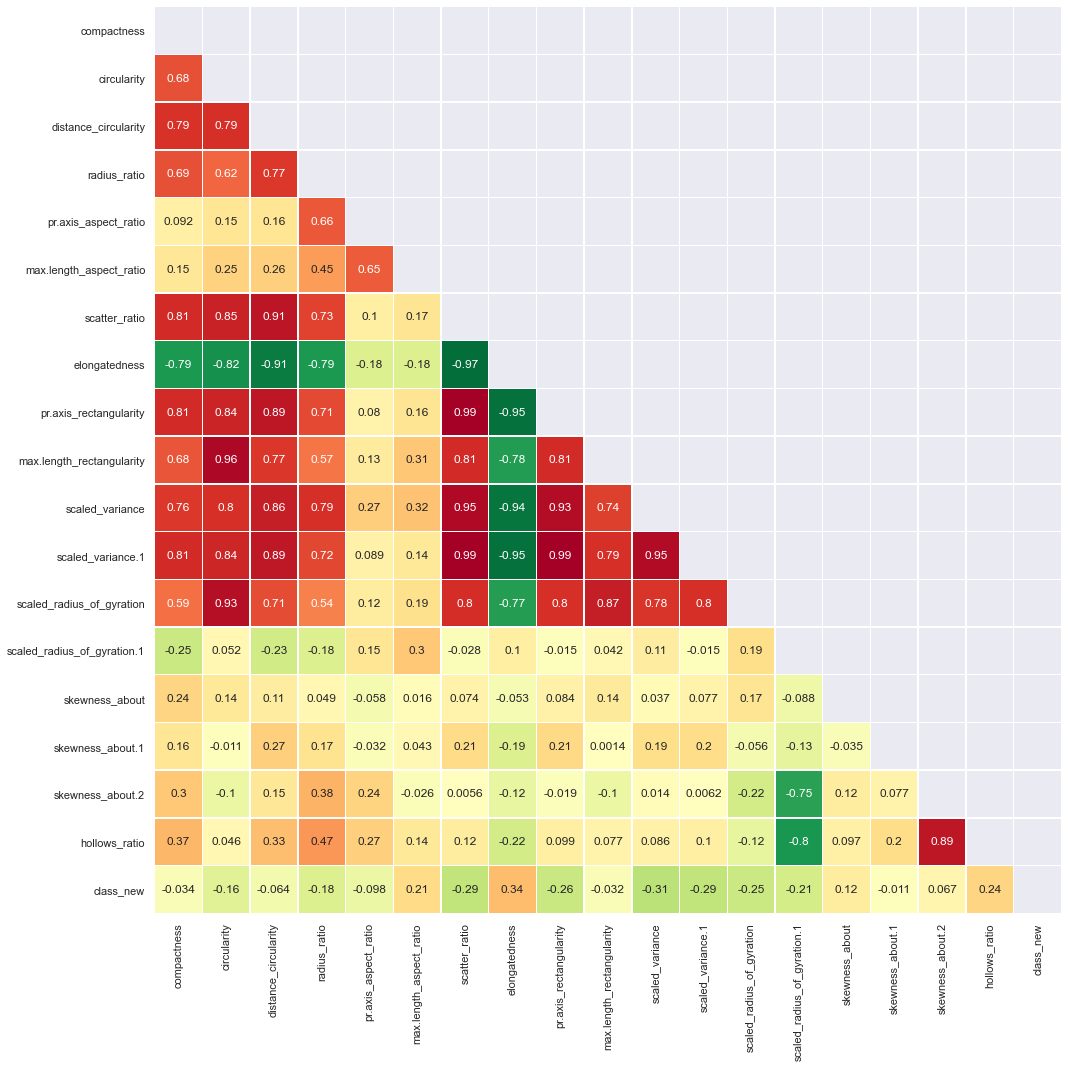

In [163]:
#Check the correlation of independent variables

sns.set(font_scale=1)
corr = dataframe.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr,
            annot=True,
            linewidths=.5,
            cmap = 'RdYlGn_r',
            center=0,
            mask = mask,
            cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.autoscale(tight=True)
plt.tight_layout()
plt.show()


In [164]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=10)

X_scaled_train.shape, X_scaled_test.shape


((592, 18), (254, 18))

In [165]:
#Scaling the X_train and X_test seperately to minimize the data loss. 

std_columns = X.columns
X_scaled_train = pd.DataFrame(StandardScaler().fit_transform(X_scaled_train))
X_scaled_test = pd.DataFrame(StandardScaler().fit_transform(X_scaled_test))
X_scaled.columns = std_columns

In [166]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='poly', gamma= 1)
svc_model.fit(X_scaled_train, y_train['class_new'].ravel())
y_predict = svc_model.predict(X_scaled_test)

In [167]:
#Finding Hyper - parameteres for SVC Classifier
C_value = np.arange(.1,1,.1)
gamma_value = np.arange(1,20,1)
kernel_value = ['linear','poly','rbf','sigmoid']
hyper_parms = dict(C=C_value, kernel=kernel_value, gamma = gamma_value)
clf = GridSearchCV(SVC(),hyper_parms,cv=10,verbose=True,n_jobs=-1)
tuned_model = clf.fit(X_scaled,y['class_new'].ravel())

Fitting 10 folds for each of 684 candidates, totalling 6840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 6840 out of 6840 | elapsed:  1.4min finished


In [168]:
# View best hyperparameters
print('Best C:', tuned_model.best_estimator_.get_params()['C'])
print('Best Kernel:', tuned_model.best_estimator_.get_params()['kernel'])
print('Best gamma:', tuned_model.best_estimator_.get_params()['gamma'])

Best C: 0.9
Best Kernel: linear
Best gamma: 1


In [169]:
#Kfold cross validation score - using hyperparameters from previous step
score = cross_val_score(SVC(C=.1,kernel = 'poly',gamma=1),X_scaled_train,y_train['class_new'].ravel(),
                        scoring = 'accuracy', cv=10)

In [170]:
#Print scores
score


array([0.96666667, 0.95      , 0.91525424, 0.94915254, 0.91525424,
       0.94915254, 0.94915254, 0.94915254, 0.89830508, 0.98305085])

In [171]:
dt_accuracy = accuracy_score(y_test,y_predict)
train_accuracy = svc_model.score(X_scaled_train, y_train)
dt_f1score = f1_score(y_test,y_predict, average='weighted')
dt_recall = recall_score(y_test, y_predict, average='weighted')
dt_precision = precision_score(y_test, y_predict, average='weighted')
method = 'before PCA 18 components'
final_result = pd.DataFrame({'Method':method,
                                    'Train Accuracy': train_accuracy,
                                    'Test Accuracy':dt_accuracy,
                                    'F1-Score':dt_f1score,
                                    'Recall': dt_recall,
                                    'precision': dt_precision,
                                    '10 fold Mean score': score.mean(),
                                    '10 Fold STD ': score.std()
                                   }, index=[0])

In [172]:
final_result

Method  Train Accuracy  Test Accuracy  F1-Score   Recall  \
0  before PCA 18 components             1.0        0.92126  0.921536  0.92126   

   precision  10 fold Mean score  10 Fold STD   
0   0.923746            0.942514      0.024289

In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [174]:
#print eigen values and eigen vectors
print('Eigen values')
print(pca.explained_variance_)
print('')
print('Eigen vectors')
print(pca.components_)

Eigen values
[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]

Eigen vectors
[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-0

In [175]:
#Print variance explained by various components
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


In [176]:
# the "cumulative variance explained" analysis 
tot = sum(pca.explained_variance_)

var_exp = [( i /tot ) * 100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


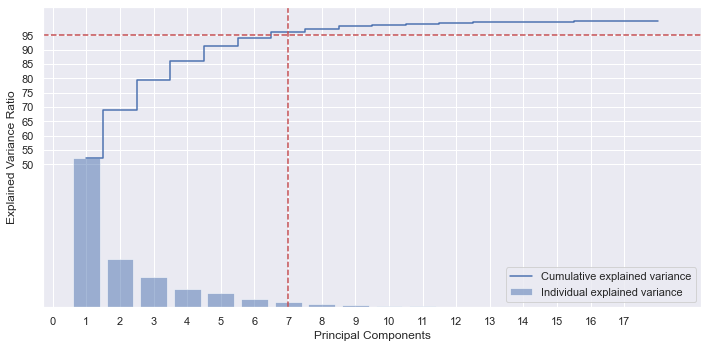

In [177]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))

plt.bar(range(1, pca.explained_variance_.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')

plt.legend(loc = 'best')
plt.axhline(y=95, color='r', linestyle='--')
plt.axvline(x=7, color='r', linestyle='--')


plt.yticks(np.arange(50,100,5))
plt.xticks(np.arange(0,18,1))
plt.tight_layout()
plt.show()

In [179]:
# Check Outliers
def find_outlier(data,name):
    """ This Function counts and prints outlier in a data set. 
    lower limit = Q1 - 1.5 * IQR, Upeer limit = Q3 + 1.5 IQR
    Return = None """
    iqr = stats.iqr(data)
    upper_lim = np.percentile(data,75) + (1.5 * iqr)
    lower_lim = np.percentile(data,25) - (1.5 * iqr)
    outlier = []
    for number in data:
        if (number > upper_lim) or (number < lower_lim):
            outlier.append(number)            
    print (' {} = There are total {} ({:0.2f}%) outliers'.format(name,
                                                len(outlier), 
                                                len(outlier)*100/len(data)))



Observation:

7 Principal components explain the 95% variation in the dataset.

STEP7: Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.

In [182]:
def run_pca_extraction(components):
    """ This Function run a PCA extraction with given components, and run a Support vector classifier
     and 10 fold validation.
     
    Return = evaluation scores """
    #run the PCA for given components
    pca = PCA(n_components=components)
    pca.fit(X_scaled)   
    X_scaled_pca= pca.transform(X_scaled)
    
    
    #Split the pca dataset into train and test
    X_pca_train, X_pca_test, y_pca_train, y_pca_test =train_test_split(X_scaled_pca, y, test_size=.30, random_state=10)

    # Building a Support Vector Machine on train data - Use same parameters as earlier
    svc_model = SVC(C= .1, kernel='poly', gamma= 1)
    svc_model.fit(X_pca_train, y_pca_train['class_new'].ravel())
    y_pca_predict= svc_model.predict(X_pca_test)
    
       
    #Kfold cross validation score - using hyperparameters
    pca_score = cross_val_score(SVC(C=.1,kernel = 'poly',gamma=1),X_scaled_pca,y['class_new'].ravel(),
                                scoring = 'accuracy', cv=10)
    X_scaled_pca_temp = add_constant(X_scaled_pca)
    vif = pd.Series([variance_inflation_factor(X_scaled_pca, i) 
               for i in range(X_scaled_pca.shape[1])])
    print('variance inflation factors for {} Component = {}'.format(components, vif.ravel()))
    
    #Evaluation Metrics
    dt_accuracy = accuracy_score(y_pca_test,y_pca_predict)
    train_accuracy = svc_model.score(X_pca_train, y_pca_train)
    dt_f1score = f1_score(y_pca_test,y_pca_predict, average='weighted')
    dt_recall = recall_score(y_pca_test, y_pca_predict, average='weighted')
    dt_precision = precision_score(y_pca_test, y_pca_predict, average='weighted')
    method = 'After PCA - '+str(component)+' Component'
    result= pd.DataFrame({'Method':method,
                                        'Train Accuracy': train_accuracy,
                                        'Test Accuracy':dt_accuracy,
                                        'F1-Score':dt_f1score,
                                        'Recall': dt_recall,
                                        'precision': dt_precision,
                                        '10 fold Mean score': pca_score.mean(),
                                        '10 Fold STD ': pca_score.std()
                                       }, index=[components-6])
    return result

In [183]:
#Though 95 variance is explained by 7 components, But I will run the model with components = 7,8 and 9, and 10 
#(variance explained 96.10354875 (7 component)  97.33504945(8 component) 98.22626473(9 component) and 98.735 (10 components) )
for component in [7,8,9,10]:
    result = run_pca_extraction(component)
    final_result = pd.concat([final_result,result])

    
#Print VIF - A value of 1 shows that there is no multicollinerity between the principal components

variance inflation factors for 7 Component = [1. 1. 1. 1. 1. 1. 1.]
variance inflation factors for 8 Component = [1. 1. 1. 1. 1. 1. 1. 1.]
variance inflation factors for 9 Component = [1. 1. 1. 1. 1. 1. 1. 1. 1.]
variance inflation factors for 10 Component = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Observation:

VIF = 1 shows the mulitcollinearity is completely removed post PCA.


In [185]:
final_result

Method  Train Accuracy  Test Accuracy  F1-Score  \
0  before PCA 18 components        1.000000       0.921260  0.921536   
1   After PCA - 7 Component        0.971284       0.893701  0.893763   
2   After PCA - 8 Component        0.996622       0.889764  0.889608   
3   After PCA - 9 Component        0.998311       0.893701  0.893917   
4  After PCA - 10 Component        0.998311       0.889764  0.890022   

     Recall  precision  10 fold Mean score  10 Fold STD   
0  0.921260   0.923746            0.942514      0.024289  
1  0.893701   0.895137            0.887689      0.027728  
2  0.889764   0.890065            0.918389      0.036271  
3  0.893701   0.896797            0.921989      0.029091  
4  0.889764   0.893209            0.913697      0.037514

Observation:

    PCA with 7 component, though explains 95% variation in dataset. But with 7 principal components, there is a dramatic drop in accuracy.
    Hence I also ran the PCA with 8,9,10 components.
    Looking at 10-fold cross validation mean score, with n_components = 9, there is minimum drop in the score.
    This shows that after reducing the dimensions (from 18 to 9), there is a minimum sacrifice for accuracy.

